In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Loading the data into a dataframe
data = pd.read_csv("National_Stock_Exchange_of_India_Ltd.csv")
data

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10
5,BAJFINANCE,"7,021.00","7,047.90","6,775.00","6,780.00",-345.80,-4.85,16.89,"1,161.63","8,050.00","4,362.00",44.57,-13.69
6,BHARTIARTL,763,763,733.1,735.85,-29.30,-3.83,111.43,830.06,781.8,454.11,58.55,5.70
7,BPCL,397.15,397.2,375,377.4,-22.70,-5.67,100.23,383.54,503,357,-1.22,-12.45
8,BRITANNIA,"3,560.00","3,635.10","3,533.95","3,566.60",-6.80,-0.19,3.73,133.23,"4,153.00","3,317.30",0.30,-3.42
9,CIPLA,892,976.05,890.65,965,65.05,7.23,144.59,"1,380.90","1,005.00",726.5,31.89,6.34


In [3]:
# Selecting 10 stocks
stocks = ['COALINDIA','DRREDDY','HDFCBANK','ICICIBANK','AXISBANK','RELIANCE','TCS','WIPRO','NESTLEIND','INFY']
df = data.loc[data['Symbol'].isin(stocks)]
df = df.reset_index(drop=True)
df

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
1,COALINDIA,157.75,159.4,155.35,155.9,-2.65,-1.67,118.30,185.5,203.8,123.25,25.78,-10.94
2,DRREDDY,"4,580.00","4,820.00","4,576.15","4,750.00",158.40,3.45,10.72,508.97,"5,614.60","4,135.00",-1.17,1.80
3,HDFCBANK,"1,500.00","1,506.70","1,485.00","1,489.50",-36.45,-2.39,93.12,"1,394.10","1,725.00","1,342.00",6.18,-9.88
4,ICICIBANK,739,742.05,718.6,720.45,-30.60,-4.07,189.88,"1,385.86",867,465.8,52.41,-13.14
5,INFY,"1,702.55","1,718.35","1,684.00","1,689.55",-32.85,-1.91,44.94,764.67,"1,848.00","1,091.00",51.44,-0.83
6,NESTLEIND,"19,148.85","19,434.10","18,982.50","19,250.00",71.95,0.38,0.56,108.61,"20,609.15","16,002.10",9.87,0.17
7,RELIANCE,"2,467.80","2,477.60","2,401.50","2,405.10",-87.85,-3.52,72.75,"1,770.19","2,751.35","1,830.00",23.48,-9.62
8,TCS,"3,425.00","3,490.00","3,411.90","3,439.20",-6.70,-0.19,19.41,670.58,"3,989.90","2,624.45",27.32,-1.25
9,WIPRO,632,634.4,619.65,621.3,-15.40,-2.42,41.39,259.37,739.85,346.25,77.51,-7.01


In [4]:
# Removing commas from the data and converting it from string to float
df["Open"] = [float(str(i).replace(",", "")) for i in df["Open"]]
df["High"] = [float(str(i).replace(",", "")) for i in df["High"]]
df["Low"] = [float(str(i).replace(",", "")) for i in df["Low"]]
df["LTP"] = [float(str(i).replace(",", "")) for i in df["LTP"]]
df["Turnover (crs.)"] = [float(str(i).replace(",", "")) for i in df["Turnover (crs.)"]]
df["52w H"] = [float(str(i).replace(",", "")) for i in df["52w H"]]
df["52w L"] = [float(str(i).replace(",", "")) for i in df["52w L"]]
df

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,AXISBANK,669.00,674.90,660.45,661.00,-18.90,-2.78,102.53,684.00,866.90,568.40,10.19,-21.49
1,COALINDIA,157.75,159.40,155.35,155.90,-2.65,-1.67,118.30,185.50,203.80,123.25,25.78,-10.94
2,DRREDDY,4580.00,4820.00,4576.15,4750.00,158.40,3.45,10.72,508.97,5614.60,4135.00,-1.17,1.80
3,HDFCBANK,1500.00,1506.70,1485.00,1489.50,-36.45,-2.39,93.12,1394.10,1725.00,1342.00,6.18,-9.88
4,ICICIBANK,739.00,742.05,718.60,720.45,-30.60,-4.07,189.88,1385.86,867.00,465.80,52.41,-13.14
5,INFY,1702.55,1718.35,1684.00,1689.55,-32.85,-1.91,44.94,764.67,1848.00,1091.00,51.44,-0.83
6,NESTLEIND,19148.85,19434.10,18982.50,19250.00,71.95,0.38,0.56,108.61,20609.15,16002.10,9.87,0.17
7,RELIANCE,2467.80,2477.60,2401.50,2405.10,-87.85,-3.52,72.75,1770.19,2751.35,1830.00,23.48,-9.62
8,TCS,3425.00,3490.00,3411.90,3439.20,-6.70,-0.19,19.41,670.58,3989.90,2624.45,27.32,-1.25
9,WIPRO,632.00,634.40,619.65,621.30,-15.40,-2.42,41.39,259.37,739.85,346.25,77.51,-7.01


In [5]:
# Dropping columns which are unnecessary for PCA
df = df.drop(['Open','High','Low','LTP'], axis=1)
df

,Symbol,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,AXISBANK,-18.90,-2.78,102.53,684.00,866.90,568.40,10.19,-21.49
1,COALINDIA,-2.65,-1.67,118.30,185.50,203.80,123.25,25.78,-10.94
2,DRREDDY,158.40,3.45,10.72,508.97,5614.60,4135.00,-1.17,1.80
3,HDFCBANK,-36.45,-2.39,93.12,1394.10,1725.00,1342.00,6.18,-9.88
4,ICICIBANK,-30.60,-4.07,189.88,1385.86,867.00,465.80,52.41,-13.14
5,INFY,-32.85,-1.91,44.94,764.67,1848.00,1091.00,51.44,-0.83
6,NESTLEIND,71.95,0.38,0.56,108.61,20609.15,16002.10,9.87,0.17
7,RELIANCE,-87.85,-3.52,72.75,1770.19,2751.35,1830.00,23.48,-9.62
8,TCS,-6.70,-0.19,19.41,670.58,3989.90,2624.45,27.32,-1.25
9,WIPRO,-15.40,-2.42,41.39,259.37,739.85,346.25,77.51,-7.01


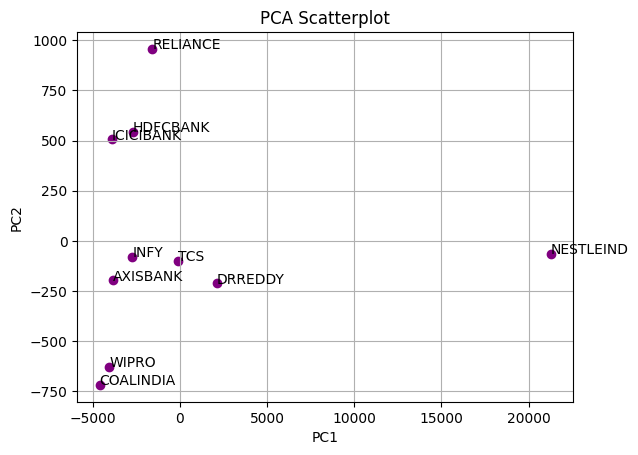

In [6]:
# Conducting Principal Component Analysis
data_x = df.iloc[:,1:]
# Standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data_x)

# create a PCA object with 2 principal components
pca = PCA(n_components=2)

# fit the PCA model to the data
pca.fit(data_x)

# transform the data onto the first two principal components
data_pca = pca.transform(data_x)

# create a scatterplot of the first two principal components
plt.scatter(data_pca[:,0], data_pca[:,1], color='purple')

# label each point with its brand name
for i, symbol in enumerate(df['Symbol']):
    plt.annotate(symbol, (data_pca[i,0], data_pca[i,1]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatterplot')
plt.grid()
plt.show()

After researching about the chosen stocks, it was observed that the stocks are arranged along x-axis on the basis of their price to earnings ratio (p/e) (Coal India has the lowest ratio of 4.82 and Nestle India has the highest ratio of 82.8).

The stocks are arranged along y-axis on the basis of their stock weightage (Reliance has the highest weightage of 10.33% and Coal India has the lowest weightage of 0.59%)